# Basit Dogrusal Regresyon

## Model

In [5]:
import pandas as pd
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


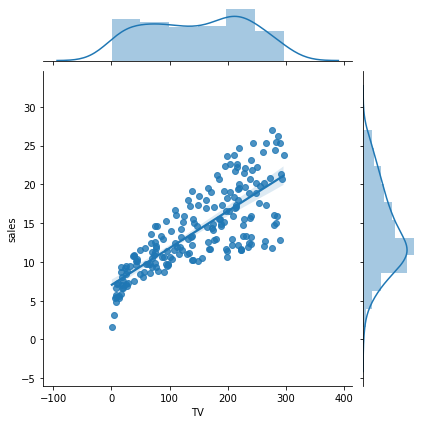

In [9]:
import seaborn as sns
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg" );

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
X = df[["TV"]]

In [12]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [13]:
y = df[["sales"]]

In [14]:
reg = LinearRegression()

In [15]:
model = reg.fit(X, y)

In [16]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
str(model)

'LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)'

In [19]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [20]:
#b0
model.intercept_

array([7.03259355])

In [21]:
#b1
model.coef_

array([[0.04753664]])

In [22]:
#rkare
#Bagimli degiskendeki degisikligin bagimsiz degiskenlerce aciklanma yuzdesi
model.score(X,y)

0.611875050850071

## Tahmin

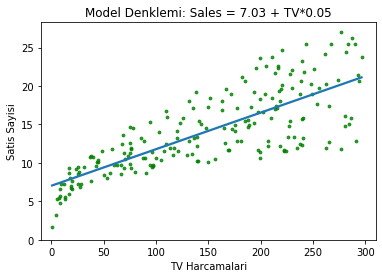

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"], df["sales"], ci = None, scatter_kws = {'color':'g', 's':8})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satis Sayisi")
g.set_xlabel("TV Harcamalari")
plt.xlim(-10,310)
plt.ylim(bottom = 0);

In [32]:
model.intercept_ + model.coef_*165

array([[14.87613922]])

In [33]:
model.predict([[165]])

array([[14.87613922]])

In [34]:
yeni_veri = [[5], [15], [30]]

In [36]:
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

## Artiklar ve Makine Ogrenmesindeki Onemi

##### MSE: Hata Kareler Ortalamasi
##### RMSE: Hata Kareler Ortalamasinin Karekoku

In [42]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [43]:
model.predict(X)[0:10]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

In [44]:
gercek_y = y[0:10]
tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10])
hatalar = pd.concat([gercek_y, tahmin_edilen_y], axis = 1)
hatalar.columns = ["gercek_y", "tahmin_edilen_y"]
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [45]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]

In [46]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [48]:
hatalar["hata_kareler"] = hatalar["hata"]**2
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [50]:
import numpy as np
np.mean(hatalar["hata_kareler"])

9.290350329638105

# Coklu Dogrusal Regresyon

## Model

In [1]:
import pandas as pd
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df.drop('sales', axis = 1)
y = df[["sales"]]

In [6]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [7]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


Statsmodel ile model kurmak

In [10]:
import statsmodels.api as sm

In [11]:
lm = sm.OLS(y,X)

In [12]:
model = lm.fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Wed, 06 May 2020   Prob (F-statistic):                   2.43e-171
Time:                        02:19:28   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Scikit learn ile model kurmak

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [18]:
model = lm.fit(X,y)
model.intercept_

array([2.93888937])

In [19]:
model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

## Tahmin

* Sales = 2.94 + TV*0.04 + radio*0.19 - newspaper*0.001

* 30 birim TV, 10 birim radio, 40 birim gazete harcamasi

In [20]:
2.94 + 30*0.04 + 10*0.19 - 40*0.001

5.999999999999999

In [21]:
yeni_veri = [[30],[10],[40]]

In [23]:
yeni_veri = pd.DataFrame(yeni_veri).T
yeni_veri

,0,1,2
0,30,10,40


In [27]:
yeni_veri2 = [[300],[120],[400]]

In [28]:
yeni_veri2 = pd.DataFrame(yeni_veri2).T
yeni_veri2

,0,1,2
0,300,120,400


In [29]:
model.predict(yeni_veri)

array([[6.15562918]])

In [30]:
model.predict(yeni_veri2)

array([[38.87688782]])

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [33]:
model.predict(X)[0:10]

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872]])

In [34]:
MSE = mean_squared_error(y,model.predict(X))
MSE

2.784126314510936

In [36]:
import numpy as np
RMSE = np.sqrt(MSE)
RMSE

1.6685701407225697

## Model Tuning (Model Dogrulama)

In [38]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [39]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [40]:
#sinama seti
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 99)

In [42]:
X_train.head()

,TV,radio,newspaper
16,67.8,36.6,114.0
51,100.4,9.6,3.6
97,184.9,21.0,22.0
164,117.2,14.7,5.4
71,109.8,14.3,31.7


In [43]:
y_train.head()

,sales
16,12.5
51,10.7
97,15.5
164,11.9
71,12.4


In [44]:
X_test.head()

,TV,radio,newspaper
135,48.3,47.0,8.5
127,80.2,0.0,9.2
191,75.5,10.8,6.0
66,31.5,24.6,2.2
119,19.4,16.0,22.3


In [45]:
y_test.head()

,sales
135,11.6
127,8.8
191,9.9
66,9.5
119,6.6


In [46]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#egitim hatasi


1.7244414935853614

In [48]:
#test hatasi
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.4233192591119648

In [49]:
#k-katli cross validation
#random state argumani degistiginde farkli sonuclar alinabilir

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")

array([-2.1019073 , -2.48953197, -3.09704214, -2.34694216, -3.68175761,
       -1.8691401 , -3.18173007, -4.1927349 , -2.17128376, -8.03821974])

In [54]:
#Cross Validation MSE
CV_MSE = np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))
CV_MSE

3.3170289742341246

In [55]:
#Cross Validation MSE
CV_RMSE = np.sqrt(CV_MSE)
CV_RMSE 

1.8212712522395242

In [56]:
#Cross Validation RMSE
CV_RMSE_all = np.sqrt(np.mean(-cross_val_score(model, X, y, cv = 10, scoring = "neg_mean_squared_error")))
CV_RMSE_all

1.749276312684338